### Linyao Li (NetID: linyaol2)

In [1]:
import pandas as pd
import bqplot
import matplotlib.pyplot as plt
import ipywidgets as ipw
from IPython.display import display, clear_output

In [2]:
df1 = pd.read_csv('COVID-19 Cases.csv')

In [3]:
df1

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Confirmed,319,1,4/11/2020,Mauritius,NaN,NaN,NaN,NaN,-20.200000,57.500000,Time Series,4/12/2020 8:14:42 PM
1,Deaths,0,0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.034300,-77.396300,Time Series,4/12/2020 8:14:42 PM
2,Confirmed,16,0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51.000000,9.000000,Time Series,4/12/2020 8:14:42 PM
3,Deaths,0,0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.933300,-116.576500,Time Series,4/12/2020 8:14:42 PM
4,Deaths,0,0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.016700,153.400000,Time Series,4/12/2020 8:14:42 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575635,Confirmed,0,0,1/22/2020,US,New Mexico,Sierra,"Sierra, New Mexico, US",35051.0,33.130282,-107.192589,Time Series,4/12/2020 8:14:42 PM
575636,Deaths,0,0,1/22/2020,US,Louisiana,Lafayette,"Lafayette, Louisiana, US",22055.0,30.204905,-92.069599,Time Series,4/12/2020 8:14:42 PM
575637,Deaths,0,0,1/22/2020,Uzbekistan,NaN,NaN,NaN,NaN,41.377500,64.585300,Time Series,4/12/2020 8:14:42 PM
575638,Deaths,0,0,1/22/2020,US,Virginia,Bristol,"Bristol, Virginia, US",51520.0,36.616302,-82.163591,Time Series,4/12/2020 8:14:42 PM


In [4]:
# map_mark = bqplot.Map(scales={'projection': bqplot.AlbersUSA()})
# fig = bqplot.Figure(marks=[map_mark], title='Basic Map Example')
# #fig.layout.min_height='800px'
# fig

In [5]:
# scales
sc_geo = bqplot.Mercator()
map_data = bqplot.topo_load('map_data/WorldMap.json') # have to specify shapes to draw
def_tt = bqplot.Tooltip(fields=['id', 'name'])
# Marks
our_map = bqplot.Map(map_data=map_data, 
                        scales={'projection':sc_geo},tooltip=def_tt)
# Interaction
our_map.interactions = {'click': 'select', 'hover': 'tooltip'}

def get_data_value(change): 
#     print(change['owner'].selected) # so we have IDs, but we want to print state names
    if change['owner'].selected is not None:
        for i,s in enumerate(change['owner'].selected): # over all selected states
            print(state_names[s == ids])
our_map.observe(get_data_value,'selected')


# Fig
fig=bqplot.Figure(marks=[our_map], 
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [6]:
# df1.loc[df1['Country_Region'] == 'Canada'].values

In [7]:
# df1[(df1['Country_Region']=='Canada')&(df1['Cases']==0)]

In [8]:
# df1['Date']

In [9]:
df_US = df1[df1['Country_Region']=='US']

In [10]:
# df_US.groupby('Date')['Cases'].sum().plot()

In [11]:
# US Map
sc_geo = bqplot.AlbersUSA()
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# Interactions
# tooltip
out = ipw.Output()
def hover_handler(self,content):
    out.clear_output()
    with out:
        label = ipw.Label(content['data']['name'])
        num = df_US[(df_US['Province_State']==content['data']['name'])&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum().max()
        num1 = df_US[(df_US['Province_State']==content['data']['name'])&(df_US['Case_Type']=='Deaths')].groupby('Date')['Cases'].sum().max()
        display(label)
        print('Confirmed Cases:'+str(num))
        print('Death Cases:'+str(num1))

# print selected states name
def get_data_value(change):
    if change['owner'].selected is not None:
        for i,s in enumerate(change['owner'].selected): # loop through all selected states
            print(state_names[s == ids])
            
# (1.5) tooltip 
# def_tt = bqplot.Tooltip(fields=['id', 'name'])
# states_map = bqplot.Map(map_data=state_data, 
#                         scales={'projection':sc_geo}, 
#                         tooltip=def_tt)
states_map = bqplot.Map(map_data=state_data, 
                        scales={'projection':sc_geo},
                        tooltip=out,
                        selected_styles = {'selected_fill':'#B0C4DE'},
                        hovered_styles={'hovered_fill':'Orange'})

states_map.interactions = {'click': 'select','hover':'tooltip'}
states_map.observe(get_data_value,'selected')
states_map.on_hover(hover_handler)

fig=bqplot.Figure(marks=[states_map], 
                  title='US States Map',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [12]:
states_map.selected

In [14]:
from states_utils import get_ids_and_names # the states_utils.py file is in the downloads section for today
ids, state_names = get_ids_and_names(states_map) # pulls out names and ids

state_names, ids

(array(['Washington', 'Montana', 'Idaho', 'North Dakota', 'Minnesota',
        'Maine', 'Michigan', 'Wisconsin', 'Oregon', 'South Dakota',
        'New Hampshire', 'Vermont', 'New York', 'Wyoming', 'Iowa',
        'Nebraska', 'Massachusetts', 'Illinois', 'Pennsylvania',
        'Connecticut', 'Rhode Island', 'California', 'Utah', 'Nevada',
        'Ohio', 'Indiana', 'New Jersey', 'Colorado', 'West Virginia',
        'Missouri', 'Kansas', 'Delaware', 'Maryland', 'Virginia',
        'Kentucky', 'Arizona', 'Oklahoma', 'New Mexico', 'Tennessee',
        'North Carolina', 'Texas', 'Arkansas', 'South Carolina', 'Alabama',
        'Georgia', 'Mississippi', 'Louisiana', 'Florida', 'Hawaii',
        'Alaska'], dtype='<U14'),
 array([53, 30, 16, 38, 27, 23, 26, 55, 41, 46, 33, 50, 36, 56, 19, 31, 25,
        17, 42,  9, 44,  6, 49, 32, 39, 18, 34,  8, 54, 29, 20, 10, 24, 51,
        21,  4, 40, 35, 47, 37, 48,  5, 45,  1, 13, 28, 22, 12, 15,  2]))

In [15]:
# df_US[df_US['Province_State']=='Texas'].groupby('Admin2')["Cases"].sum().max()

In [16]:
# df_US[df_US['Province_State']=='Texas'].groupby('Admin2')["Cases"].sum().values

In [17]:
# df_US[df_US['Province_State']=='Texas']["Cases"].max()

In [18]:
# df_IL_Cham = df_US[(df_US['Province_State']=='Illinois')&(df_US['Admin2']=='Champaign')&(df_US['Case_Type']=='Confirmed')]
# df_IL_Cham

In [19]:
# df_IL_Cham['Date'] = pd.to_datetime(df_IL_Cham['Date'])

In [20]:
# df_IL_Cham.sort_values('Date',inplace=True)

In [21]:
# df_IL_Cham

In [22]:
# plt.plot(df_IL_Cham['Date'],df_IL_Cham['Cases'])

In [23]:
# Convert the date
# from datetime import datetime
# dates = df_IL_Cham['Date']
# xd = [datetime.strptime(d, '%m/%d/%Y').date() for d in dates]
# sorted(xs)

In [24]:
# import matplotlib.dates as mdates
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.plot(sorted(xs),df_IL_Cham['Cases'])
# plt.show()

In [25]:
# Sort df_US by dates
df_US['Date'] = pd.to_datetime(df_US['Date'])
df_US.sort_values('Date',inplace=True)
df_US

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
575639,Confirmed,0,0,2020-01-22,US,Alabama,Lee,"Lee, Alabama, US",1081.0,32.601549,-85.351322,Time Series,4/12/2020 8:14:42 PM
557317,Deaths,0,0,2020-01-22,US,Arkansas,Phillips,"Phillips, Arkansas, US",5107.0,34.432685,-90.848002,Time Series,4/12/2020 8:14:42 PM
557318,Deaths,0,0,2020-01-22,US,North Carolina,Madison,"Madison, North Carolina, US",37115.0,35.854027,-82.713464,Time Series,4/12/2020 8:14:42 PM
557319,Confirmed,0,0,2020-01-22,US,Kansas,Phillips,"Phillips, Kansas, US",20147.0,39.784655,-99.346689,Time Series,4/12/2020 8:14:42 PM
557320,Deaths,0,0,2020-01-22,US,Michigan,Branch,"Branch, Michigan, US",26023.0,41.916006,-85.059295,Time Series,4/12/2020 8:14:42 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438560,Confirmed,2,0,2020-04-12,US,Oklahoma,Choctaw,"Choctaw, Oklahoma, US",40023.0,34.028074,-95.547711,Time Series,4/12/2020 8:14:42 PM
272284,Deaths,0,0,2020-04-12,US,Oregon,Gilliam,"Gilliam, Oregon, US",41021.0,45.371601,-120.204887,Time Series,4/12/2020 8:14:42 PM
438577,Confirmed,5,0,2020-04-12,US,Tennessee,Overton,"Overton, Tennessee, US",47133.0,36.341178,-85.289895,Time Series,4/12/2020 8:14:42 PM
184654,Confirmed,34,3,2020-04-12,US,New York,Washington,"Washington, New York, US",36115.0,43.311538,-73.430434,Time Series,4/12/2020 8:14:42 PM


In [26]:
# confirmed cases
df_US[(df_US['Province_State']=='Illinois')&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum().max()

20852

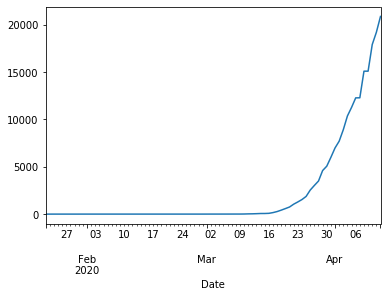

In [27]:
# the change curve of confirmed cases
df_US[(df_US['Province_State']=='Illinois')&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum().plot()

In [28]:
df_lineplot = df_US[(df_US['Province_State']=='Illinois')&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum()
df_lineplot = pd.DataFrame(df_lineplot)
df_lineplot

,Cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,1
2020-01-25,1
2020-01-26,1
...,...
2020-04-08,15078
2020-04-09,15079
2020-04-10,17887


In [29]:
# Line plot
# scales
x_scl = bqplot.DateScale() 
y_scl = bqplot.LinearScale()
# axis
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Confirmed Cases', 
                     scale=y_scl, 
                    orientation='vertical', side='left')

# marks
# df_lineplot = df_US[(df_US['Province_State']=='Illinois')&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum()
# df_lineplot = pd.DataFrame(df_lineplot)
lines = bqplot.Lines(x = df_lineplot.index, y = df_lineplot['Cases'],
                    scales = {'x': x_scl, 'y': y_scl})

# fig
fig_lines = bqplot.Figure(marks = [lines], axes = [ax_ycl, ax_xcl])
fig_lines

Figure(axes=[Axis(label='Confirmed Cases', orientation='vertical', scale=LinearScale(), side='left'), Axis(lab…

#### Dashboard-Version1

In [30]:
## Map
sc_geo = bqplot.AlbersUSA()
state_data = bqplot.topo_load('map_data/USStatesMap.json')

out = ipw.Output()
def hover_handler(self,content):
    out.clear_output()
    with out:
        label = ipw.Label(content['data']['name'])
#         df_US[(df_US['Province_State']=='Illinois')&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum().max()
        num = df_US[(df_US['Province_State']==content['data']['name'])&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum().max()
        num1 = df_US[(df_US['Province_State']==content['data']['name'])&(df_US['Case_Type']=='Deaths')].groupby('Date')['Cases'].sum().max()
        display(label)
        print('Confirmed Cases:'+str(num))
        print('Death Cases:'+str(num1))

# more interactions:
def get_data_value(change):
    #print(change['owner'].selected) # so we have IDs, but we want to print state names
    if change['owner'].selected is not None:
        for i,s in enumerate(change['owner'].selected): # over all selected states
            print(state_names[s == ids])

states_map = bqplot.Map(map_data=state_data, 
                        scales={'projection':sc_geo},tooltip=out,
                        selected_styles = {'selected_fill':'#B0C4DE'},
                        hovered_styles={'hovered_fill':'Orange'})

states_map.interactions = {'click': 'select','hover':'tooltip'}

In [31]:
## Line plot
# scales
x_scl = bqplot.DateScale() 
y_scl = bqplot.LinearScale()
# axis
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Confirmed Cases', 
                     scale=y_scl, 
                    orientation='vertical', side='left')

# marks
# df_lineplot = df_US[df_US['Case_Type']=='Confirmed'].groupby('Date')['Cases'].sum()
# df_lineplot = pd.DataFrame(df_lineplot)
lines = bqplot.Lines(x = df_lineplot.index, y = df_lineplot['Cases'],
                    scales = {'x': x_scl, 'y': y_scl})

In [32]:
### Interactions
def get_data_value(change):
#     snames = '' # store what state names we are plotting
    if change['owner'].selected is not None: # if several states are selected
        ll = []
        for i,s in enumerate(change['owner'].selected): # loop through all states selected
            sn = state_names[s == ids][0] # grab the state name
#             snames += sn + ', ' # add to our label
            # Line plot selection
            df_lineplot = df_US[(df_US['Province_State']==sn)&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum()
            df_lineplot = pd.DataFrame(df_lineplot)
            ll.append(bqplot.Lines(x = df_lineplot.index, y = df_lineplot['Cases'], scales = {'x': x_scl, 'y': y_scl}))           
        fig_lines.marks = ll # update lines
#         ax_ycl.label='Total Export from ' + snames # list of selected states
    else: # if no states are selected
        df_lineplot = df_US[df_US['Case_Type']=='Confirmed'].groupby('Date')['Cases'].sum()
        df_lineplot = pd.DataFrame(df_lineplot)
        lines = bqplot.Lines(x = df_lineplot.index, y = df_lineplot['Cases'], scales = {'x': x_scl, 'y': y_scl})             
        fig_lines.marks = [lines]

states_map.observe(get_data_value,'selected')
states_map.on_hover(hover_handler)

In [33]:
## Create figure
fig_map = bqplot.Figure(marks=[states_map], title='US States Map',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})

fig_lines = bqplot.Figure(marks = [lines], 
                          axes = [ax_ycl, ax_xcl])

In [34]:
## Display
fig_map.layout.min_width='500px'
fig_lines.layout.min_width='500px'

myDashboard = ipw.HBox([fig_map,fig_lines])
myDashboard

In [35]:
# Sort df1 by dates
df1['Date'] = pd.to_datetime(df1['Date'])
df1.sort_values('Date',inplace=True)
df1

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
575639,Confirmed,0,0,2020-01-22,US,Alabama,Lee,"Lee, Alabama, US",1081.0,32.601549,-85.351322,Time Series,4/12/2020 8:14:42 PM
559612,Confirmed,0,0,2020-01-22,US,Texas,Menard,"Menard, Texas, US",48327.0,30.889907,-99.820479,Time Series,4/12/2020 8:14:42 PM
559611,Confirmed,0,0,2020-01-22,US,Michigan,Schoolcraft,"Schoolcraft, Michigan, US",26153.0,46.192357,-86.199722,Time Series,4/12/2020 8:14:42 PM
559610,Confirmed,0,0,2020-01-22,US,Georgia,Walker,"Walker, Georgia, US",13295.0,34.733764,-85.301652,Time Series,4/12/2020 8:14:42 PM
559609,Confirmed,0,0,2020-01-22,US,Iowa,Monroe,"Monroe, Iowa, US",19135.0,41.029888,-92.869067,Time Series,4/12/2020 8:14:42 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478025,Confirmed,18,2,2020-04-12,US,Mississippi,Walthall,"Walthall, Mississippi, US",28147.0,31.149715,-90.104467,Time Series,4/12/2020 8:14:42 PM
532809,Deaths,0,0,2020-04-12,US,New Mexico,Curry,"Curry, New Mexico, US",35009.0,34.574211,-103.346888,Time Series,4/12/2020 8:14:42 PM
296128,Confirmed,0,0,2020-04-12,US,North Carolina,Hyde,"Hyde, North Carolina, US",37095.0,35.420177,-76.151805,Time Series,4/12/2020 8:14:42 PM
64445,Confirmed,10,0,2020-04-12,US,Georgia,Marion,"Marion, Georgia, US",13197.0,32.348340,-84.527336,Time Series,4/12/2020 8:14:42 PM


In [36]:
# df1['Country_Region'].unique()

#### Dashboard-Version2

In [37]:
## Map
sc_geo = bqplot.AlbersUSA()
state_data = bqplot.topo_load('map_data/USStatesMap.json')

out = ipw.Output()
def hover_handler(self,content):
    out.clear_output()
    with out:
        label = ipw.Label(content['data']['name'])
#         df_US[(df_US['Province_State']=='Illinois')&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum().max()
        num = df_US[(df_US['Province_State']==content['data']['name'])&(df_US['Case_Type']=='Confirmed')].groupby('Date')['Cases'].sum().max()
        num1 = df_US[(df_US['Province_State']==content['data']['name'])&(df_US['Case_Type']=='Deaths')].groupby('Date')['Cases'].sum().max()
        display(label)
        print('Confirmed Cases:'+str(num))
        print('Death Cases:'+str(num1))

# # more interactions:
# def get_data_value(change):
#     #print(change['owner'].selected) # so we have IDs, but we want to print state names
#     if change['owner'].selected is not None:
#         for i,s in enumerate(change['owner'].selected): # over all selected states
#             print(state_names[s == ids])

states_map = bqplot.Map(map_data=state_data, 
                        scales={'projection':sc_geo},tooltip=out,
                        selected_styles = {'selected_fill':'#B0C4DE'},
                        hovered_styles={'hovered_fill':'Orange'})

states_map.interactions = {'click': 'select','hover':'tooltip'}

In [38]:
## Line plot
# scales
x_scl = bqplot.DateScale() 
y_scl = bqplot.LinearScale()
# axis
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Confirmed Cases', 
                     scale=y_scl, 
                    orientation='vertical', side='left')

# marks
lines = bqplot.Lines(x = df_lineplot.index, y = df_lineplot['Cases'],
                    scales = {'x': x_scl, 'y': y_scl})

In [39]:
dropdown_cd = ipw.Dropdown(options=['Confirmed','Deaths'])

In [40]:
### Interactions
def get_data_value1(change):
    if change['owner']==states_map:
        if change['owner'].selected is not None: # if several states are selected
            ll = []
            for i,s in enumerate(change['owner'].selected): # loop through all states selected
                sn = state_names[s == ids][0] # grab the state name
                # Line plot selection
                mask = (df_US['Province_State']==sn)&(df_US['Case_Type']==dropdown_cd.value)
                df_lineplot = df_US[mask].groupby('Date')['Cases'].sum()
                df_lineplot = pd.DataFrame(df_lineplot)
                ll.append(bqplot.Lines(x = df_lineplot.index, y = df_lineplot['Cases'], scales = {'x': x_scl, 'y': y_scl}))           
            ax_ycl.label=dropdown_cd.value+'Cases' # list of selected states
            fig_lines.marks = ll # update lines
    #     else: # if no states are selected
    #         df_lineplot = df_US[df_US['Case_Type']=='Confirmed'].groupby('Date')['Cases'].sum()
    #         df_lineplot = pd.DataFrame(df_lineplot)
    #         lines = bqplot.Lines(x = df_lineplot.index, y = df_lineplot['Cases'], scales = {'x': x_scl, 'y': y_scl})             
    #         fig_lines.marks = [lines]
    
    if change['owner']==dropdown_cd:
        if states_map.selected is not None: # if several states are selected
            ll = []
            for i,s in enumerate(states_map.selected): # loop through all states selected
                sn = state_names[s == ids][0] # grab the state name
                # Line plot selection
                mask = (df_US['Province_State']==sn)&(df_US['Case_Type']==dropdown_cd.value)
                df_lineplot = df_US[mask].groupby('Date')['Cases'].sum()
                df_lineplot = pd.DataFrame(df_lineplot)
                ll.append(bqplot.Lines(x = df_lineplot.index, y = df_lineplot['Cases'], scales = {'x': x_scl, 'y': y_scl}))           
            ax_ycl.label=dropdown_cd.value+'Cases' # list of selected states
            fig_lines.marks = ll # update lines

states_map.observe(get_data_value1)
states_map.on_hover(hover_handler)
dropdown_cd.observe(get_data_value1)

In [41]:
## Create figure
fig_map = bqplot.Figure(marks=[states_map], title='COVID-19 CASES-US',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})

fig_lines = bqplot.Figure(marks = [lines], 
                          axes = [ax_ycl, ax_xcl])

In [42]:
## Display
fig_map.layout.min_width='500px'
fig_lines.layout.min_width='500px'

LinePlot = ipw.VBox([dropdown_cd,fig_lines])
myDashboard = ipw.HBox([fig_map,LinePlot])
myDashboard

Dashboard version 2 is my final version for final project part 2.

### HOW TO USE?

This dashboard displays the confirmed cases and total deaths of COVID-19 in US. It contains two parts. The left component is a US states map. When the user hovers the pointer over a state, the hovered states will change to orange and a tooltip will appear which contains information like state name, number of confirmed cases and total deaths so far. The right component is a line plot which shows the trend of the COVID-19 cases over time (from 01/22/2020 to 04/12/2020). It will change correspondingly as the selected states in the left component change (the selected states will change to blue). For comparison, if multiple states are selected, multiple curves will be displayed simultaneously in the line plot. Besides, user can also choose to display the confirmed cases curve or the total deaths curve through the dropdown list above the line plot.

### Contextual datasets

Source: https://data.world/chandrasekar/coronatracking


From the website above, the two datasets below could be useful in telling the whole story about COVID-19.

https://covid.ourworldindata.org/data/total_cases.csv, 


https://covid.ourworldindata.org/data/total_deaths.csv


These two data sets are the summary of the confirmed cases and death cases of COVID-19 in various countries around the world. By visualizing these two datasets, the global outbreak of COVID-19 can be more clearly shown, instead of just US. They can be used for the introduction part.